In [195]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import pandas as pd
# Crear un conjunto de datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)




In [196]:
df = pd.read_csv('/content/pinguinos.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Revisamos valores faltantes

In [197]:
df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,10


Eliminamos las filas que el sexo sea un valor faltante

In [198]:
df.dropna(subset=['sex'],axis="index",inplace=True)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Conversion de variables categoricas a numeros

In [199]:
df['species_id'] = df['species'].astype('category').cat.codes
df['island_id'] = df['island'].astype('category').cat.codes
df['sex_id'] = df['sex'].astype('category').cat.codes
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_id,island_id,sex_id
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0,2,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0,2,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0,2,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0,2,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0,2,2
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,2,0,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,2,0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,2,0,2
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,2,0,1


Separamos el dataset en train y test

In [200]:
X = df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','island_id','sex_id']]
y = df["species"]

Normalizar

In [201]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)
X

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667, 1.        ,
        1.        ],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556, 1.        ,
        0.5       ],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778, 1.        ,
        0.5       ],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222, 0.        ,
        1.        ],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444, 0.        ,
        0.5       ],
       [0.64727273, 0.35714286, 0.69491525, 0.75      , 0.        ,
        1.        ]])

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [203]:
X_train.shape

(267, 6)

In [204]:
y_train.shape

(267,)

In [205]:
# Definir el modelo
from sklearn import tree

model = tree.DecisionTreeClassifier(random_state=0)
modelo_completo = tree.DecisionTreeClassifier(random_state=0)
# Configurar RFE
rfe = RFE(estimator=model, n_features_to_select=4)

# Ajustar RFE al conjunto de datos
rfe.fit(X_train, y_train)

# Obtener las características seleccionadas
selected_features = rfe.support_
ranking = rfe.ranking_

print("Características seleccionadas:", selected_features)
print("Ranking de características:", ranking)

Características seleccionadas: [ True  True  True  True False False]
Ranking de características: [1 1 1 1 3 2]


In [206]:
modelo_completo.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [207]:
y_pred = modelo_completo.predict(X_test)

In [208]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
acc=  accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy:", acc)
print("Precision:", pre)
print("Recall:", rec)
print("F1-score:", f1)

Accuracy: 0.9552238805970149
Precision: 0.9468390804597702
Recall: 0.960727969348659
F1-score: 0.9517907712810262


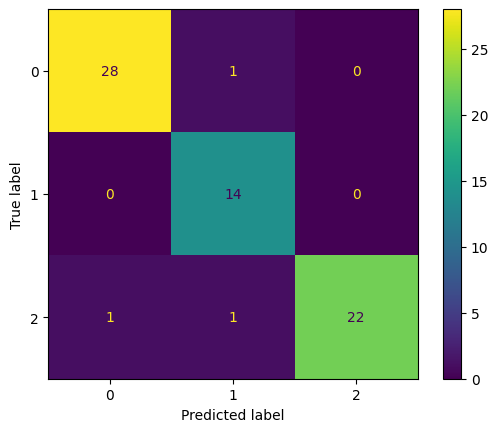

In [209]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Filtrando

In [210]:
model.fit(X_train[:,:3], y_train)

DecisionTreeClassifier(random_state=0)

In [211]:
y_pred = model.predict(X_test[:,:3])

In [212]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
acc=  accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy:", acc)
print("Precision:", pre)
print("Recall:", rec)
print("F1-score:", f1)

Accuracy: 0.9253731343283582
Precision: 0.9096638655462185
Recall: 0.925424192665572
F1-score: 0.9141999458674738


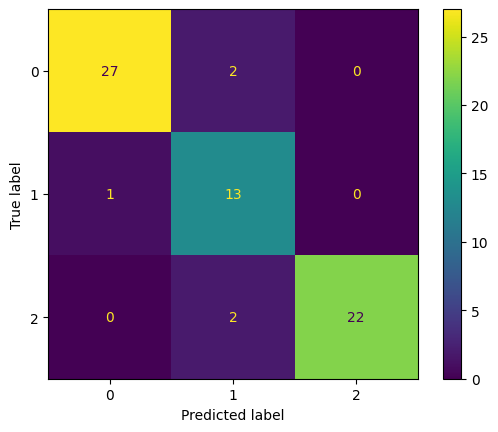

In [213]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()